In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [34]:
t = pd.DataFrame(data={'1980':[41, 12], '2000':[72,32], '2010': [144, 122]},
                index=['commensal', 'BSI'])

In [35]:
t

,1980,2000,2010
commensal,41,72,144
BSI,12,32,122


In [36]:
t = pd.DataFrame(data={'year':[1980, 2000, 2010, 1980, 2000, 2010],
                       'value': [41, 72, 144, 12, 32, 122],
                       'prediction': ['commensal', 'commensal', 'commensal',
                                     'BSI', 'BSI', 'BSI']})

In [37]:
t

,year,value,prediction
0,1980,41,commensal
1,2000,72,commensal
2,2010,144,commensal
3,1980,12,BSI
4,2000,32,BSI
5,2010,122,BSI


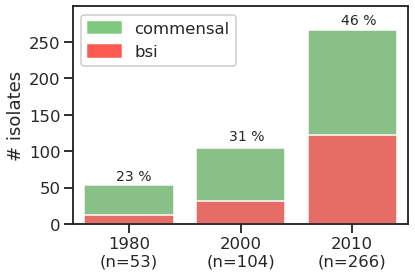

In [110]:
fig, ax = plt.subplots()

# top bar -> sum all values to find y position
total = t.groupby('year')['value'].sum().reset_index()
# create bar 1
bar1 = sns.barplot(x = "year",  y = "value", data = total, 
                   color = '#7fc97f')
# create bar 2
bsi = t[t.prediction == 'BSI']
bar2 = sns.barplot(x = "year", y = "value", data=bsi, 
                   color='xkcd:coral')
# add legend
top_bar = mpatches.Patch(color='#7fc97f', label='commensal')
bottom_bar = mpatches.Patch(color='xkcd:coral', label='bsi')
legend = plt.legend(handles=[top_bar, bottom_bar])
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))


plt.xlabel('')
plt.ylabel('# isolates')

ax.set_xticklabels(['1980\n(n=53)', 
                          '2000\n(n=104)',
                          '2010\n(n=266)'])
ax.set_ylim(0,299)

plt.text(0.2, 75, "23 %", size=14,
         ha="right", va="top")
plt.text(0.9, 130, "31 %", size=14,
         ha="left", va="top")
plt.text(1.9, 290, "46 %", size=14,
         ha="left", va="top")

plt.savefig('../out/figures/predictions.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../out/figures/predictions.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);